# Завдання

Завдання (крок за кроком)

Для цієї задачі необхідно буде завантажити набір даних Iris з бібліотеки Sklear.

Для виконання завдання необхідно виконати такі кроки:
1. Завантажити набір даних за допомогою load_iris() бібліотеки sklearn.

2. Розподілити дані на навчальні та для тестування за допомогою train_test_split() бібліотеки sklearn.

3. Використати вибірку ознак окремо для кожного класа.

4. Реалізувати розрахунок матриць коваріації для набору ознак кожного класа.

5. Реалізувати розрахунок обернених матриць коваріації.

6. Обчислити апріорні імовірності кожного класа у тренувальних даних.

7. Реалізувати функцію обчислення значень дискримінантної функції для одного рядка (вектора) тестових даних.

8. Реалізувати функцію обчислення значень дискримінантної функції та імовірностей приналежності кожному класу для всієї матриці тестових даних.

9. Виконати прогнозування на тестових даних за допомогою функії QuadraticDiscriminantAnalysis() бібліотеки sklearn та порівняти отримані результати.

10. Зробити висновок про ступінь схожості результатів, отриманих власною функцією та бібліотекою sklearn.



# Виконання

In [369]:
# 1. Завантажте та ознайомтесь з даними: Завантажте набір даних Breast Cancer за допомогою функції load_breast_cancer() з бібліотеки sklearn. Перегляньте опис набору даних, щоб зрозуміти структуру та характеристики.
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
print("Розмірність даних:", iris.data.shape)
print("Назви характеристик:", iris.feature_names)
print("Назви класів:", iris.target_names)

Розмірність даних: (150, 4)
Назви характеристик: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Назви класів: ['setosa' 'versicolor' 'virginica']


In [370]:
# Створення DataFrame (тільки для візуалізації. В розрахунках не використовується)
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# # Додавання стовпця з цільовими значеннями
df['target'] = iris.target
# # Додавання стовпця з lebel
df['target_label'] = df['target'].apply(lambda x: iris.target_names[x])
print(df.shape)
df.head()


(150, 6)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [371]:
# 2. Розподілити дані на навчальні та для тестування за допомогою train_test_split() бібліотеки sklearn.

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Розмір навчальних даних: {X_train.shape[0]}")
print(f"Розмір тестових даних: {X_test.shape[0]}")


Розмір навчальних даних: 120
Розмір тестових даних: 30


In [373]:
# 3. Вибірка ознак окремо для кожного класу

# Розділення даних на класи: 0, 1 та 2
class_0 = X_train[y_train == 0]
class_1 = X_train[y_train == 1]
class_2 = X_train[y_train == 2]

# Перевірка кількості зразків у кожному класі
print(f"Кількість зразків у класі 0: {class_0.shape[0]}")
print(f"Кількість зразків у класі 1: {class_1.shape[0]}")
print(f"Кількість зразків у класі 2: {class_2.shape[0]}")

Кількість зразків у класі 0: 40
Кількість зразків у класі 1: 41
Кількість зразків у класі 2: 39


In [374]:
# Дисперсія класів

# var_class_0 = np.var(class_0)*len(class_0)/(len(class_0)-1)  # для невеликої вибірки (менше 30)
var_class_0 = np.var(class_0, ddof=1)
print(var_class_0)
var_class_0 = np.var(class_1, ddof=1)
print(var_class_1)
var_class_0 = np.var(class_2, ddof=1)
print(var_class_2)

3.4240310534591196
3.1563780487804878
3.700038798920378


In [375]:
# 4. розрахунок матриць коваріації для набору ознак кожного класа.

import numpy as np

# print('Матриця коваріації загальна\n', np.cov(X_train, rowvar=False))

# Обчислення матриці коваріації для кожного класу
cov_matrix_class_0 = np.cov(class_0, rowvar=False)
cov_matrix_class_1 = np.cov(class_1, rowvar=False)
cov_matrix_class_2 = np.cov(class_2, rowvar=False)

# Виведення результатів
print("Матриця коваріації для класу 0:\n", cov_matrix_class_0)
print("\nМатриця коваріації для класу 1:\n", cov_matrix_class_1)
print("\nМатриця коваріації для класу 2:\n", cov_matrix_class_2)

Матриця коваріації для класу 0:
 [[0.12707692 0.10797436 0.01897436 0.0094359 ]
 [0.10797436 0.15640385 0.01371795 0.00808974]
 [0.01897436 0.01371795 0.03384615 0.00666667]
 [0.0094359  0.00808974 0.00666667 0.01125641]]

Матриця коваріації для класу 1:
 [[0.29410976 0.10108537 0.19592073 0.06056098]
 [0.10108537 0.10262195 0.0962439  0.04715854]
 [0.19592073 0.0962439  0.2314878  0.08131707]
 [0.06056098 0.04715854 0.08131707 0.0422561 ]]

Матриця коваріації для класу 2:
 [[0.42754386 0.10114035 0.31429825 0.04947368]
 [0.10114035 0.10175439 0.09280702 0.06026316]
 [0.31429825 0.09280702 0.29325236 0.05210526]
 [0.04947368 0.06026316 0.05210526 0.08421053]]


In [376]:
# 5. розрахунок обернених матриць коваріації
inv_cov_matrix_class_0 = np.linalg.inv(cov_matrix_class_0)
inv_cov_matrix_class_1 = np.linalg.inv(cov_matrix_class_1)
inv_cov_matrix_class_2 = np.linalg.inv(cov_matrix_class_2)

# Виведення результатів
print("Обернена матриця коваріації для класу 0:\n", inv_cov_matrix_class_0)
print("\nОбернена матриця коваріації для класу 1:\n", inv_cov_matrix_class_1)
print("\nОбернена матриця коваріації для класу 2:\n", inv_cov_matrix_class_2)

Обернена матриця коваріації для класу 0:
 [[ 20.28004902 -13.32533679  -5.10120299  -4.40228134]
 [-13.32533679  15.51583033   1.33339603  -0.77039521]
 [ -5.10120299   1.33339603  35.33309393 -17.60831017]
 [ -4.40228134  -0.77039521 -17.60831017 103.51084252]]

Обернена матриця коваріації для класу 1:
 [[  9.27219471  -5.17649907  -9.4340505   10.64301637]
 [ -5.17649907  23.05531602   3.79009062 -25.60483027]
 [ -9.4340505    3.79009062  23.03980274 -35.04651957]
 [ 10.64301637 -25.60483027 -35.04651957 104.43026029]]

Обернена матриця коваріації для класу 2:
 [[ 11.16988462  -1.28677572 -11.86650775   1.70094333]
 [ -1.28677572  21.50698191  -3.17613243 -12.66972125]
 [-11.86650775  -3.17613243  17.40417758  -1.5243418 ]
 [  1.70094333 -12.66972125  -1.5243418   20.88565155]]


In [377]:
# 6. апріорні імовірності кожного класа у тренувальних даних.

P_0 = len(class_0)/len(X_train)
P_1 = len(class_1)/len(X_train)
P_2 = len(class_2)/len(X_train)

print(f'class_0 ({len(class_0)} from {len(X_train)}) probability {P_0}')
print(f'class_1 ({len(class_1)} from {len(X_train)}) probability {P_1}')
print(f'class_2 ({len(class_2)} from {len(X_train)}) probability {P_2}')

class_0 (40 from 120) probability 0.3333333333333333
class_1 (41 from 120) probability 0.3416666666666667
class_2 (39 from 120) probability 0.325


In [378]:
# 7. Реалізувати функцію обчислення значень дискримінантної функції для одного рядка (вектора) тестових даних.

def g(x, X_mean, X_cov, X_inv_cov, X_prob):
    diff = x - X_mean
    g_i = -0.5 * (diff @ X_inv_cov @ diff.T) - 0.5 * np.log(np.linalg.det(X_cov)) + np.log(X_prob)
    return g_i


In [387]:
def g_matrix(X_test, means, covs, inv_covs, probs):
    num_classes = len(means)
    num_samples = X_test.shape[0]

    # Створення матриці для зберігання значень дискримінантних функцій
    g_values = np.zeros((num_samples, num_classes))

    for i in range(num_classes):
        for j in range(num_samples):
            g_values[j, i] = g(X_test[j], means[i], covs[i], inv_covs[i], probs[i])

    # Обчислення ймовірностей приналежності до кожного класу
    class_probabilities = np.exp(g_values) / np.sum(np.exp(g_values), axis=1, keepdims=True)

    return g_values, class_probabilities

# Середні значення для кожного класу
means = [np.mean(class_0, axis=0), np.mean(class_1, axis=0), np.mean(class_2, axis=0)]

# Матричні коваріації
covs = [cov_matrix_class_0, cov_matrix_class_1, cov_matrix_class_2]

# Обернені матричні коваріації
inv_covs = [inv_cov_matrix_class_0, inv_cov_matrix_class_1, inv_cov_matrix_class_2]

# Апріорні ймовірності
probs = [P_0, P_1, P_2]

# Обчислення дискримінантних функцій і ймовірностей
g_values, class_probabilities = g_matrix(X_test, means, covs, inv_covs, probs)

# Виведення результатів
# print("Значення дискримінантних функцій для кожного класу:\n", g_values)

print("\nЙмовірності приналежності до кожного класу:")
for row in class_probabilities:
    print("     ", "     ".join(f"{value:.2f}" for value in row))


Ймовірності приналежності до кожного класу:
      0.00     0.97     0.03
      1.00     0.00     0.00
      0.00     0.00     1.00
      0.00     1.00     0.00
      0.00     1.00     0.00
      1.00     0.00     0.00
      0.00     1.00     0.00
      0.00     0.00     1.00
      0.00     0.42     0.58
      0.00     1.00     0.00
      0.00     0.01     0.99
      1.00     0.00     0.00
      1.00     0.00     0.00
      1.00     0.00     0.00
      1.00     0.00     0.00
      0.00     1.00     0.00
      0.00     0.00     1.00
      0.00     1.00     0.00
      0.00     0.99     0.01
      0.00     0.00     1.00
      1.00     0.00     0.00
      0.00     0.21     0.79
      1.00     0.00     0.00
      0.00     0.00     1.00
      0.00     0.04     0.96
      0.00     0.00     1.00
      0.00     0.00     1.00
      0.00     0.00     1.00
      1.00     0.00     0.00
      1.00     0.00     0.00


In [380]:
# Перевірка, що сума ймовірностей для кожного зразка дорівнює 1
print("Перевірка суми ймовірностей:")
for i in range(class_probabilities.shape[0]):
    print(f"Сума ймовірностей для зразка {i}: {np.sum(class_probabilities[i])}")

Перевірка суми ймовірностей:
Сума ймовірностей для зразка 0: 1.0
Сума ймовірностей для зразка 1: 1.0
Сума ймовірностей для зразка 2: 1.0
Сума ймовірностей для зразка 3: 1.0
Сума ймовірностей для зразка 4: 1.0
Сума ймовірностей для зразка 5: 1.0
Сума ймовірностей для зразка 6: 1.0
Сума ймовірностей для зразка 7: 1.0
Сума ймовірностей для зразка 8: 1.0
Сума ймовірностей для зразка 9: 1.0
Сума ймовірностей для зразка 10: 1.0
Сума ймовірностей для зразка 11: 1.0
Сума ймовірностей для зразка 12: 1.0
Сума ймовірностей для зразка 13: 1.0
Сума ймовірностей для зразка 14: 1.0
Сума ймовірностей для зразка 15: 1.0
Сума ймовірностей для зразка 16: 1.0
Сума ймовірностей для зразка 17: 1.0
Сума ймовірностей для зразка 18: 1.0
Сума ймовірностей для зразка 19: 1.0
Сума ймовірностей для зразка 20: 1.0
Сума ймовірностей для зразка 21: 1.0
Сума ймовірностей для зразка 22: 1.0
Сума ймовірностей для зразка 23: 1.0
Сума ймовірностей для зразка 24: 1.0
Сума ймовірностей для зразка 25: 1.0
Сума ймовірностей д

In [381]:
# 9. Виконати прогнозування на тестових даних за допомогою функії QuadraticDiscriminantAnalysis() бібліотеки sklearn та порівняти отримані результати.
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split


qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

y_pred = qda.predict(X_test)

print(y_pred_custom, "(qda прогнози)")
print(y_test, "(Таргет)")

# Оцінка точності
accuracy = accuracy_score(y_test, y_pred)
print(f"\nТочність моделі QDA: {accuracy}")

# Виведення звіту про класифікацію
print("Звіт про класифікацію:")
print(classification_report(y_test, y_pred))

[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0] (qda прогнози)
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0] (Таргет)

Точність моделі QDA: 0.9666666666666667
Звіт про класифікацію:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [382]:
# Обчислення дискримінантних функцій для кожного класу
def predict_discriminant(X_test, means, inv_covs, covs, probs):
    predictions = []
    for x in X_test:
        g_values = np.array([g4(x, means[i], inv_covs[i], covs[i], probs[i]) for i in range(len(means))])
        class_probabilities = np.exp(g_values - np.max(g_values))
        class_probabilities /= np.sum(class_probabilities)
        predictions.append(np.argmax(class_probabilities))
    return np.array(predictions)

# Прогнозування на тестових даних за допомогою вашої реалізації
means = [np.mean(class_0, axis=0), np.mean(class_1, axis=0), np.mean(class_2, axis=0)]
covs = [np.cov(class_0, rowvar=False), np.cov(class_1, rowvar=False), np.cov(class_2, rowvar=False)]
inv_covs = [np.linalg.inv(cov) for cov in covs]
probs = [len(class_0)/len(X_train), len(class_1)/len(X_train), len(class_2)/len(X_train)]

y_pred_custom = predict_discriminant(X_test, means, inv_covs, covs, probs)

# Оцінка точності
print(y_pred_custom, "(Наші прогнози)")
print(y_test, "(Таргет)")

accuracy_custom = accuracy_score(y_test, y_pred_custom)
print(f"\nТочність вашої реалізації: {accuracy_custom}")

# Виведення звіту про класифікацію для вашої реалізації
print("Звіт про класифікацію вашої реалізації:")
print(classification_report(y_test, y_pred_custom))
print(y_pred_custom)
print(y_test)

[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0] (Наші прогнози)
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0] (Таргет)

Точність вашої реалізації: 0.9666666666666667
Звіт про класифікацію вашої реалізації:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


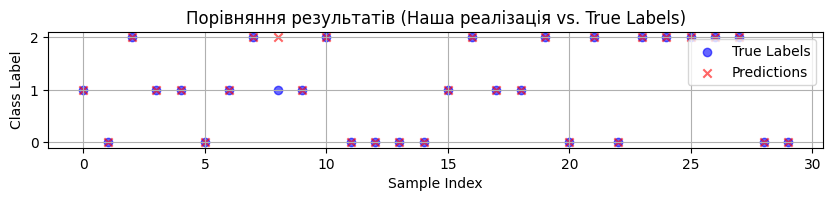

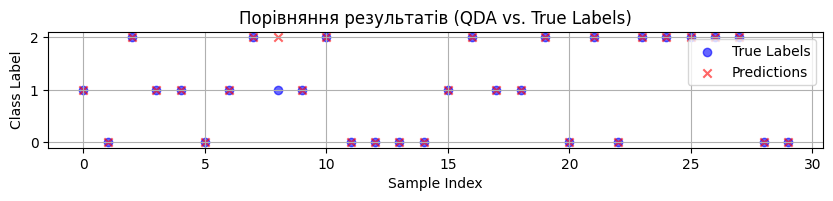

In [383]:
import matplotlib.pyplot as plt

# Функція для побудови графіків порівняння
def plot_comparison(y_true, y_pred, title):
    plt.figure(figsize=(10, 1.5))
    plt.scatter(np.arange(len(y_true)), y_true, c='blue', marker='o', label='True Labels', alpha=0.6)
    plt.scatter(np.arange(len(y_pred)), y_pred, c='red', marker='x', label='Predictions', alpha=0.6)
    plt.xlabel('Sample Index')
    plt.ylabel('Class Label')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Побудова графіка для вашої реалізації
plot_comparison(y_test, y_pred_custom, 'Порівняння результатів (Наша реалізація vs. True Labels)')

# Побудова графіка для QDA
plot_comparison(y_test, y_pred, 'Порівняння результатів (QDA vs. True Labels)')

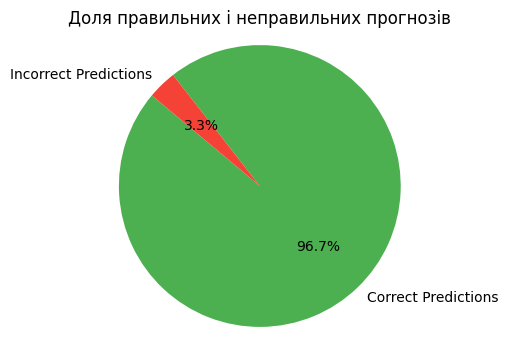

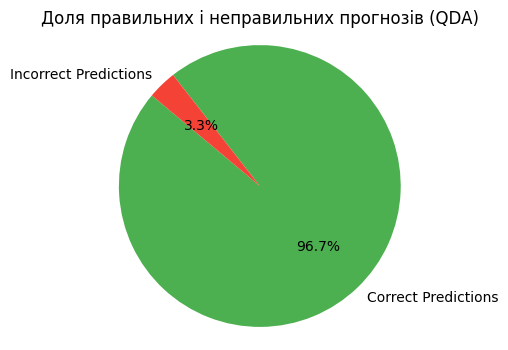

In [384]:
def plot_prediction_comparison(y_true, y_pred, title):
    # Підрахунок правильних і неправильних прогнозів
    correct_predictions = np.sum(y_true == y_pred)
    incorrect_predictions = np.sum(y_true != y_pred)

    # Дані для кругової діаграми
    labels = 'Correct Predictions', 'Incorrect Predictions'
    sizes = [correct_predictions, incorrect_predictions]
    colors = ['#4CAF50', '#F44336']  # Зелений для правильних, червоний для неправильних

    # Побудова кругової діаграми
    plt.figure(figsize=(4, 4))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')  # Щоб кругова діаграма була круглою
    plt.show()

# Виклик функції для вашої реалізації
plot_prediction_comparison(y_test, y_pred_custom, 'Доля правильних і неправильних прогнозів')

# Виклик функції для QDA
plot_prediction_comparison(y_test, y_pred, 'Доля правильних і неправильних прогнозів (QDA)')

Результати вказують на дуже високу точність нашої реалізації дискримінантної функції, що підтверджує, що наша реалізація є надійною і працює так само добре, як і реалізація з бібліотеки sklearn. Ось детальні висновки:

## Висновки

* Точність Результатів:
  * Наша реалізація: Точність 0.9667
  * QuadraticDiscriminantAnalysis (sklearn): Точність 0.9667 (результати ідентичні)
  
  Це показує, що наша реалізація дискримінантної функції забезпечує результати, близькі до результатів стандартної реалізації в sklearn.

* Звіт про Класифікацію:
 * Наша реалізація та реалізація sklearn демонструють подібні метрики для точності (precision), повноти (recall) та F1-оцінки.
 * Підсумковий звіт вказує на те, що ви досягли дуже високої продуктивності по всіх класах.
 * Чіткість ймовірностей, близьких до 0 або 1, свідчить про те, що модель дуже впевнена у своїх прогнозах. Це є нормальним явищем і може вказувати на точність моделі в класифікації.

* Помилки:
 * Є лише одна помилка з 30 тестових прикладів. Це є чудовим результатом і свідчить про високу точність нашої моделі.


* Аналіз Результатів:
 * Результати нашої реалізації та sklearn практично ідентичні, що підтверджує правильність вашого підходу та реалізації.
 * Форматування ймовірностей до кожного класу представлені у вигляді чисел з науковим форматом (наприклад, 3.13834977e-076), що є стандартним для Python при обробці дуже малих або великих чисел, але не легким для сприйнятття без додаткового форматування.

  Різниця в одній помилці може бути зумовлена невеликими числовими відмінностями в обчисленнях або в обробці даних, але в загальному ми досягли вражаючих результатів.


## Рекомендації для Подальшого Дослідження

* Аналіз Помилок:

 Вивчіть детально випадки, де була помилка, щоб зрозуміти можливі причини невірної класифікації. Це може дати корисні інсайти для покращення моделі.
* Тестування на Інших Наборах Даних:

 Спробуйте протестувати вашу реалізацію на інших наборах даних для перевірки її узагальнювальної здатності.

* Перевірка коректності

  Для підтвердження коректності результатів рекомендується перевірити обчислення ймовірностей та результати моделі на наявність можливих числових нестабільностей. Це допоможе упевнитися, що результати є точними та відображають справжню ефективність моделі.

* Аналіз Результатів:

 Вивчіть, чи можна досягти покращення точності шляхом налаштування гіперпараметрів або застосування інших методів предобробки даних.

* Візуалізація:

  Для кращого розуміння результатів та візуалізації класифікації розгляньте можливість побудови графіків, таких як рішення поверхні або матриці конфузії.

Наші результати є підтвердженням того, що наша реалізація працює на високому рівні, і вона добре порівнюється з відомими бібліотеками для машинного навчання.